# Trajectory Optimization for a hop

# Run slip_test.py

In [21]:
import importlib
from archive import slip_test
importlib.reload(slip_test)

from slip_test import * 

planner = OfflinePlanner()

print("k: ", planner.aslip.k)
jump_distance = np.array([2.0, 0])

t_last = 1.0

# print(final_config)
x_traj, z_traj, t_land, v_x_traj, v_z_traj = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, jump_distance)
t = np.linspace(0, t_last, 100)
xx = x_traj(t)[-1]
zz = z_traj(t)[-1]

v_xx = v_x_traj(t)[-1]
v_zz = v_z_traj(t)[-1]
print(v_zz)
print(t_land)

dt = t[1] - t[0]

tt = t_last

x_com = []
z_com = []
x_com.append(xx)
z_com.append(zz)

t_max = t_last + t_land[0]


while tt < t_max:
    xx += v_xx * dt
    zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
    v_zz += planner.aslip.g * dt
    x_com.append(xx)
    z_com.append(zz)
    tt += dt

t = np.linspace(0, t_last, 100)
# plt.figure()
p1, = plt.plot(x_traj(t), z_traj(t), label='Optimal Trajectory')
p2, = plt.plot(x_com, z_com, label='Landing Kinematics')

plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.legend(handles=[p1, p2])
plt.show()

# plt.figure()
plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
plt.xlabel("time")
plt.ylabel("angle [degrees]")
plt.show()


ModuleNotFoundError: No module named 'slip_test'

# Run offline_planner.py

In [55]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import offline_planner
importlib.reload(offline_planner)
from offline_planner import OfflinePlanner


planner = OfflinePlanner()

print("d_0: ", planner.d_0)

t_takeoff = 0.3
distance = np.array([1.0, 0])

x_traj, z_traj, t_land, v_x_traj,  v_z_traj, f_x_traj, f_z_traj, f_vx_traj, f_vz_traj, r_traj = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_takeoff, distance)


t = np.linspace(0, t_takeoff, 100)
xx = x_traj(t)[-1]
# yy = y_traj(t)[-1]
zz = z_traj(t)[-1]

v_xx = v_x_traj(t)[-1]
v_zz = v_z_traj(t)[-1]
print(v_zz)
print(t_land)

dt = t[1] - t[0]

"""
helper function to calculate flight trajectory

t_takeoff: time at which the robot jumps
t_landing: time at which the robot lands (t_land[0])
xx: x_traj(t)[-1]
# yy: y_traj(t)[-1]
zz: z_traj(t)[-1]
v_xx = v_x_traj(t)[-1]
# v_yy = v_y_traj(t)[-1]
v_zz = v_z_traj(t)[-1]

"""
def proj_motion(planner: OfflinePlanner(), 
                t_takeoff: float, 
                t_landing: float,
                dt: float,
                xx: float,
                # yy: float,
                zz: float,
                v_xx: float,
                # v_yy: float,
                v_zz:float
            ) -> list:
    
    x_com = []
    # y_com = []
    z_com = []

    x_com.append(xx) # x_com.append(x_traj(t)[-1])
    # y_com.append(yy) # y_com.append(y_traj(t)[-1])
    z_com.append(zz) # z_com.append(z_traj(t)[-1])

    tt = t_takeoff
    t_max = t_takeoff + t_landing

    while tt < t_max:
        xx += v_xx * dt
        # yy += v_yy * dt
        zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
        v_zz += planner.aslip.g * dt
        x_com.append(xx)
        # y_com.append(yy)
        z_com.append(zz)
        tt += dt

    return x_com, z_com

# print(len(x_com))

# t = np.linspace(0, t_takeoff, 100)
x_com, z_com = proj_motion(planner, t_takeoff, t_land[0], dt, xx, zz, v_xx, v_zz)

plt.figure()
plt.title("com x vs com z")
plt.plot(x_traj(t), z_traj(t))
plt.plot(x_com, z_com)
plt.xlabel("CoM x")
plt.ylabel("CoM z")
plt.show()

t2 = np.linspace(t_takeoff, t_max, (t_max - t_takeoff)/dt + 2)

plt.figure()
plt.title("time vs CoM z")
plt.plot(t, z_traj(t))
plt.plot(t2, z_com)
plt.xlabel("time")
plt.ylabel("CoM z")
plt.show()

# plot foot z versus time (pre and post jump)
# plt.figure()
# plt.plot(t, f_z_traj(t))
# plt.plot(t2, f_z_traj(t2))
# plt.title("Foot z vs t (pre and post jump)")
# plt.xlabel("time")
# plt.ylabel("Foot z")
# plt.show()


# foot x vs foot z without post jump
# plt.figure()
# plt.plot(f_x_traj(t), f_z_traj(t))
# plt.xlabel("Foot x")
# plt.ylabel("Foot z")
# plt.show()



# plt.figure()
# plt.title("angle vs time")
# plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
# plt.show()

# plt.figure()
# plt.plot(t, z_traj(t))
# plt.show()


d_0:  0.8
d_f:  sqrt((pow(( - x_19(0) + x_19(4)), 2) + pow(( - x_19(1) + x_19(5)), 2) + pow(( - x_19(2) + x_19(6)), 2)))
/root/work/offline_planner.py:288: RuntimeWarning: divide by zero encountered in double_scalars
  s_dot_i = (1.5 / dt) * (x_ip1 - x_i) - 0.25 * (f_i + f_ip1)


RuntimeError: Times must be in increasing order.

d_0:  0.8
d_f:  sqrt((pow(( - x_19(0) + x_19(4)), 2) + pow(( - x_19(1) + x_19(5)), 2) + pow(( - x_19(2) + x_19(6)), 2)))
<class 'pydrake.trajectories.PiecewisePolynomial_[float]'>
landtime:  [0.37096866]
d_f: 0.8000000325595126
2.0057589247757406
[0.37096866]


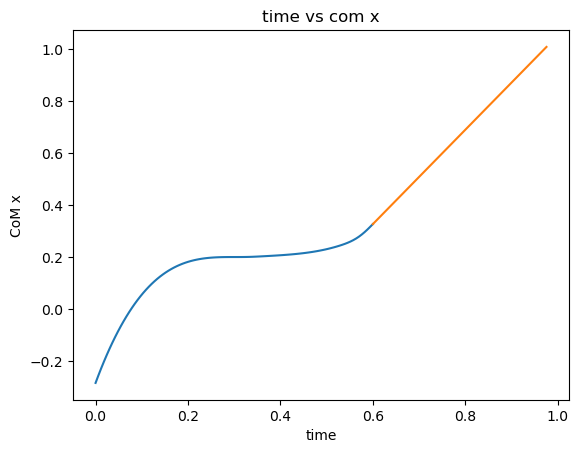

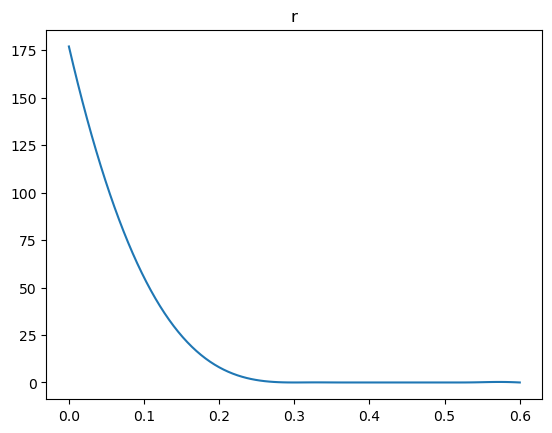

In [68]:
planner = OfflinePlanner()

print("d_0: ", planner.d_0)

t_last = 0.6
distance = np.array([1, 0])

(
    x_traj,
    z_traj,
    t_land,
    v_x_traj,
    v_z_traj,
    f_x_traj,
    f_z_traj,
    f_vx_traj,
    f_vz_traj,
    r_traj,
) = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, distance)

print("landtime: ", t_land)
# print(planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, distance))

t = np.linspace(0, t_last, 100)
xx = x_traj(t)[-1]
zz = z_traj(t)[-1]

fx = f_x_traj(t)[-1]
fz = f_z_traj(t)[-1]

d_ff = np.sqrt((xx - fz) ** 2 + (zz - fz) ** 2)
print(f"d_f: {d_ff}")

v_xx = v_x_traj(t)[-1]
v_zz = v_z_traj(t)[-1]
print(v_zz)
print(t_land)

dt = t[1] - t[0]

tt = t_last

x_com = []
z_com = []
x_com.append(xx)
z_com.append(zz)
# print(t_land)
# print(dt)

t_max = t_last + t_land[0]
# t_max = 20

while tt < t_max:
    xx += v_xx * dt
    zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
    v_zz += planner.aslip.g * dt
    x_com.append(xx)
    z_com.append(zz)
    tt += dt

tttt = np.array([0, 0.3])
xxxx = np.array([0, planner.aslip.x_0[4]])
yyyy = np.array([0, 0])
zzzz = np.array([0.8, planner.aslip.x_0[6]])

xxx = CubicSpline(tttt, xxxx)
yyy = CubicSpline(tttt, yyyy)
zzz = CubicSpline(tttt, zzzz)

# print(len(x_com))

t = np.linspace(0, t_last, 100)
t2 = np.linspace(t_last, tt, 63)

# tt = np.linspace(0.3, t_last, 100)
# plt.figure()
# plt.title("com x vs com z")
# plt.plot(x_traj(t), z_traj(t))
# plt.plot(x_com, z_com)
# # plt.plot(xxx(tt), zzz(tt))
# plt.xlabel("CoM x")
# plt.ylabel("CoM z")
# plt.show()

plt.figure()
plt.title("time vs com x")
plt.plot(t, x_traj(t))
plt.plot(t2, x_com)
plt.xlabel("time")
plt.ylabel("CoM x")
plt.show()

# t2 = np.linspace(t_last, t_max, (t_max - t_last) / dt + 2)

# plt.figure()
# plt.title("time vs CoM z")
# plt.plot(t, z_traj(t))
# plt.plot(t2, z_com)
# plt.xlabel("time")
# plt.ylabel("CoM z")
# plt.show()

plt.figure()
plt.title("r")
plt.plot(t, r_traj(t))
plt.show()


# Implement left foot planner

In [107]:
from pydrake.all import MathematicalProgram, Solve, PiecewisePolynomial
from pydrake.autodiffutils import AutoDiffXd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, CubicSpline

import importlib
import aslip
import offline_planner

importlib.reload(aslip)
from aslip import ASLIP

importlib.reload(offline_planner) 
from offline_planner import OfflinePlanner

planner = OfflinePlanner()

# print("d_0: ", planner.d_0)

t_begin_motion = 0.3 # robot starts moving after 0.3 seconds
t_takeoff = 0.3 # takeoff within 0.3 seconds
t_balance = 1 # duration of balancing/stabilization

#LEFT FOOT !!!
# MODE 0: lean forward
t_0 = np.array([0, t_begin_motion])
x_foot_0 = np.array([0.0, 0.0])
y_foot_0 = np.array([0.2, 0.2])
z_foot_0 = np.array([0.0, 0.0])

x_foot_mode0 = CubicSpline(t_0, x_foot_0)
y_foot_mode0 = CubicSpline(t_0, y_foot_0)
z_foot_mode0 = CubicSpline(t_0, z_foot_0)

# MODE 1: TAKEOFF (foot still on ground)
t_1 = np.array([t_begin_motion, t_takeoff + t_begin_motion])

x_foot_1 = np.array([0, 0])
y_foot_1 = np.array([0.2, 0.2])
z_foot_1 = np.array([0.0, 0.0])

x_foot_mode1 = CubicSpline(t_1, x_foot_1)
y_foot_mode1 = CubicSpline(t_1, y_foot_1)
z_foot_mode1 = CubicSpline(t_1, z_foot_1)

# MODE 2: PROJECTILE MOTION
jump_duration = 0.3
distance = np.array([1, 0])
(x_traj, z_traj, t_land, v_x_traj, v_z_traj, f_x_traj, f_z_traj, f_vx_traj, f_vz_traj, r_traj,) = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_begin_motion+t_takeoff, distance)
# print("land: ", t_land)

t_2 = np.array([t_1[-1], t_1[-1] + t_land[0]])

left_foot_final_x = distance[0]
x_foot_2 = np.array([0, left_foot_final_x])

x_foot_mode2 = CubicSpline(t_2, x_foot_2)
z_foot_2 = np.array([0, 0.5, 0.3])
z_foot_mode2 = CubicSpline(np.array([t_1[-1], (t_1[-1] + t_land[0] + t_1[-1])/2, t_1[-1] + t_land[0]]), z_foot_2)

y_foot_2 = np.array([0.2, 0.2])
y_foot_mode2 = CubicSpline(t_2, y_foot_2)
# # MODE 3: STABILIZE --> osc



#RIGHT FOOT !!!
# MODE 0: lean forward
# t_0 = np.array([0, t_begin_motion])
xR_foot_0 = np.array([0.0, 0.0])
yR_foot_0 = np.array([-0.2, -0.2])
zR_foot_0 = np.array([0.0, 0.0])

xR_foot_mode0 = CubicSpline(t_0, xR_foot_0)
yR_foot_mode0 = CubicSpline(t_0, yR_foot_0)
zR_foot_mode0 = CubicSpline(t_0, zR_foot_0)

# MODE 1: TAKEOFF (foot still on ground)
# t_1 = np.array([t_begin_motion, t_takeoff + t_begin_motion])

xR_foot_1 = np.array([0, 0])
yR_foot_1 = np.array([-0.2, -0.2])
zR_foot_1 = np.array([0.0, 0.0])

xR_foot_mode1 = CubicSpline(t_1, xR_foot_1)
yR_foot_mode1 = CubicSpline(t_1, yR_foot_1)
zR_foot_mode1 = CubicSpline(t_1, zR_foot_1)

# MODE 2: PROJECTILE MOTION
# jump_duration = 0.3
# distance = np.array([1, 0])
# (x_traj, z_traj, t_land, v_x_traj, v_z_traj, f_x_traj, f_z_traj, f_vx_traj, f_vz_traj, r_traj,) = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_begin_motion+t_takeoff, distance)
# print("land: ", t_land)

# t_2 = np.array([t_1[-1], t_1[-1] + t_land[0]])

right_foot_final_x = distance[0]
xR_foot_2 = np.array([0, right_foot_final_x])

xR_foot_mode2 = CubicSpline(t_2, xR_foot_2)
zR_foot_2 = np.array([0, 0.5, 0.0])
zR_foot_mode2 = CubicSpline(np.array([t_1[-1], (t_1[-1] + t_land[0] + t_1[-1])/2, t_1[-1] + t_land[0]]), zR_foot_2)

yR_foot_2 = np.array([-0.2, -0.2])
yR_foot_mode2 = CubicSpline(t_2, yR_foot_2)
# # MODE 3: STABILIZE --> osc


## COM !!!


t_com = np.linspace(0, t_begin_motion + t_takeoff, 100)
xx = x_traj(t_com)[-1]
yy = y_traj(t_com)[-1]
zz = z_traj(t_com)[-1]

v_xx = v_x_traj(t_com)[-1]
v_zz = v_z_traj(t_com)[-1]
v_yy = v_y_traj(t_com)[-1]

dt = t_com[1] - t_com[0]
tt = t_begin_motion + t_takeoff

x_com = []
y_com = []
z_com = []
t_com_proj = []
x_com.append(xx)
y_com.append(yy)
z_com.append(zz)
t_com_proj.append(tt)

t_max = t_begin_motion + t_takeoff + t_land[0]

while tt < t_max:
    xx += v_xx * dt
    yy += v_yy * dt
    zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
    v_zz += planner.aslip.g * dt
    x_com.append(xx)
    y_com.append(y)
    z_com.append(zz)
    tt += dt
    t_com_proj.append(tt)
    

tttt = np.array([0, 0.3])
xxxx = np.array([0, planner.aslip.x_0[4]])
yyyy = np.array([0, 0])
zzzz = np.array([0.8, planner.aslip.x_0[6]])

xxx = CubicSpline(tttt, xxxx)
yyy = CubicSpline(tttt, yyyy)
zzz = CubicSpline(tttt, zzzz)

t_com_t = np.linspace(t_begin_motion, t_takeoff + t_begin_motion, 100)
t_com_tt = np.linspace(0, t_begin_motion, 100)

print("tcomproj", t_com_proj.shape)
plt.figure()
plt.title("CoM x vs CoM z")
plt.plot(x_traj(t_com_t), z_traj(t_com_t))
plt.plot(x_com, z_com)
plt.plot(xxx(t_com_tt), zzz(t_com_tt))
plt.xlabel("CoM x")
plt.ylabel("CoM z")
plt.show()

plt.figure()
plt.title("Left Foot x vs Left Foot z")
plt.ylabel("Left Foot z")
plt.xlabel("Left Foot x")
plt.plot(x_foot_mode0(t_0), z_foot_mode0(t_0))
plt.plot(x_foot_mode1(t_1), z_foot_mode1(t_1))
plt.plot(x_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), z_foot_mode2(np.linspace(t_2[0], t_2[1], 100)))

plt.figure()
plt.title("Right Foot x vs Right Foot z")
plt.ylabel("Right Foot z")
plt.xlabel("Right Foot x")
plt.plot(xR_foot_mode0(t_0), zR_foot_mode0(t_0))
plt.plot(xR_foot_mode1(t_1), zR_foot_mode1(t_1))
plt.plot(xR_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), zR_foot_mode2(np.linspace(t_2[0], t_2[1], 100)))

plt.figure() 
plt.title("Foot and CoM Trajectories over Time")
plt.ylabel("Right Foot z [m]")
plt.xlabel("Time [s]")

plt.plot(t_com_t, z_traj(t_com_t), 'r')
plt.plot(t_com_proj, z_com, 'g--')
plt.plot(t_com_tt, zzz(t_com_tt), 'b')

plt.plot(t_0, z_foot_mode0(t_0), 'b')
plt.plot(t_1, z_foot_mode1(t_1), 'r')
plt.plot(np.linspace(t_2[0], t_2[1], 100), z_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), 'g')

plt.plot(t_0, zR_foot_mode0(t_0), 'b-')
plt.plot(t_1, zR_foot_mode1(t_1), 'r-')
plt.plot(np.linspace(t_2[0], t_2[1], 100), zR_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), 'g')

# plt.legend(handle=np.array(['comX,pre']))
plt.show()



# plt.figure() 
# plt.title("Foot and CoM Trajectories")
# plt.ylabel("Right Foot z")
# plt.xlabel("Right Foot x")

# plt.plot(x_traj(t_com_t), z_traj(t_com_t))
# plt.plot(x_com, z_com)
# plt.plot(xxx(t_com_tt), zzz(t_com_tt))

# plt.plot(x_foot_mode0(t_0), z_foot_mode0(t_0))
# plt.plot(x_foot_mode1(t_1), z_foot_mode1(t_1))
# plt.plot(x_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), z_foot_mode2(np.linspace(t_2[0], t_2[1], 100)))

# plt.plot(xR_foot_mode0(t_0), zR_foot_mode0(t_0))
# plt.plot(xR_foot_mode1(t_1), zR_foot_mode1(t_1))
# plt.plot(xR_foot_mode2(np.linspace(t_2[0], t_2[1], 100)), zR_foot_mode2(np.linspace(t_2[0], t_2[1], 100)))

# plt.show()


# plt.figure()
# plt.title("r")
# plt.plot(t, r_traj(t))
# plt.show()

# plot foot z versus time (pre and post jump)
# plt.figure()
# plt.plot(t, f_z_traj(t))
# plt.plot(t2, f_z_traj(t2))
# plt.title("Foot z vs t (pre and post jump)")
# plt.xlabel("time")
# plt.ylabel("Foot z")
# plt.show()


# foot x vs foot z without post jump
# plt.figure()
# plt.plot(f_x_traj(t), f_z_traj(t))
# plt.xlabel("Foot x")
# plt.ylabel("Foot z")
# plt.show()


# plt.figure()
# plt.title("angle vs time")
# plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
# plt.show()

# plt.figure()
# plt.plot(t, z_traj(t))
# plt.show()
#     planner = OfflinePlanner()
#     x_traj, z_traj, t_land, v_x_traj, v_z_traj = planner.find_com_trajectory(
#         planner.aslip.x_0 * 2, 2, np.array([12.0, 0])
#     )
#     t = np.linspace(0, 2, 100)
#     xx = x_traj(t)[-1]
#     zz = z_traj(t)[-1]

#     v_xx = v_x_traj(t)[-1]
#     v_zz = v_z_traj(t)[-1]
#     print(v_zz)
#     print(t_land)

#     dt = t[1] - t[0]

#     tt = 2

#     x_lf = []
#     z_lf = []
#     x_lf.append(xx)
#     z_lf.append(zz)
#     # print(t_land)
#     # print(dt)

#     t_max = 2 + t_land[0]
#     # t_max = 20

#     while tt < t_max:
#         xx += v_xx * dt
#         zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
#         v_zz += planner.aslip.g * dt
#         x_lf.append(xx)
#         z_lf.append(zz)
#         tt += dt

#     # print(len(x_lf))

#     # print(x_traj.shape)
#     t = np.linspace(0, 2, 100)
#     plt.figure()
#     plt.plot(x_traj(t), z_traj(t))
#     plt.plot(x_lf, z_lf)
#     plt.show()

#     plt.figure()
#     plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
#     plt.show()

#     # plt.figure()
#     # plt.plot(t, z_traj(t))
#     # plt.show()

d_f:  sqrt((pow(( - x_19(0) + x_19(4)), 2) + pow(( - x_19(1) + x_19(5)), 2) + pow(( - x_19(2) + x_19(6)), 2)))
<class 'pydrake.trajectories.PiecewisePolynomial_[float]'>


NameError: name 'y_traj' is not defined

yyunctionVisualize

## Start meshcat visualizer

Open the visualizer by clicking on the url in the output of this cell.

Run the code/begin simulation

In [116]:
import importlib
import pydot
import numpy as np
from IPython.display import SVG, display

from pydrake.all import (
    # ConnectMeshcatVisualizer,
    JointIndex,
    Simulator,
    DiagramBuilder,
    AddMultibodyPlantSceneGraph,
    Parser,
    RigidTransform,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    ConstantVectorSource,
    ConstantValueSource,
    PiecewisePolynomial,
    AbstractValue,
    HalfSpace,
    CoulombFriction,
    StartMeshcat,
)

import osc_gains
importlib.reload(osc_gains)
from osc_gains import OscGains

import osc
importlib.reload(osc)
from osc import OperationalSpaceController

import com_planner
importlib.reload(com_planner)
from com_planner import ComPlanner

# Start meshcat simulation software
# meshcat = StartMeshcat()

# Create block diagram of system
builder = DiagramBuilder()
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, 0.0005)
X_WG = HalfSpace.MakePose(
    np.array([0, 0, 1]),
    np.zeros(3),
)
plant.RegisterCollisionGeometry(
    plant.world_body(), X_WG, HalfSpace(), "collision", CoulombFriction(1.0, 1.0)
)
parser = Parser(plant)
parser.AddModelFromFile("3d_biped.urdf")
plant.Finalize()
num_positions = plant.num_positions()
num_joints = plant.num_joints()

print("floating base:")
for j in plant.GetFloatingBaseBodies():
    body = plant.get_body(j)
    start = body.floating_positions_start()
    print(body.name())

print("joints:")
# Print names of each joint
for i in range(num_joints):
    index = JointIndex(i)
    j = plant.get_joint(index)
    print(j.name())

# Print number of positions
print(f"number of positions: {num_positions}")
print(f"number of joints: {num_joints}")

# Get OSC gains
Kp = np.diag([10, 0, 10])
Kd = np.diag([10, 0, 10])
W = np.diag([1, 0, 1])

Wcom = np.eye(3)

gains = OscGains(
    Kp,
    Kd,
    Wcom,
    Kp,
    Kd,
    W,
    Kp,
    Kd,
    W,
)

planner = builder.AddSystem(ComPlanner())

# Wire OSC to plant
osc = builder.AddSystem(OperationalSpaceController(gains))
builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# Wire planner inputs
# TODO

# Wire OSC inputs
builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())

builder.Connect(
    planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
)

# TODO: Adjust target wlaking speed here
# walking_speed = 0.5  # walking speed in m/s

# osc = builder.AddSystem(OperationalSpaceController(gains))
# planner = builder.AddSystem(footstep_planner.LipTrajPlanner())
# speed_src = builder.AddSystem(ConstantVectorSource(np.array([walking_speed])))
# base_traj_src = builder.AddSystem(
#     ConstantValueSource(
#         AbstractValue.Make(
#             PiecewisePolynomial(
#                 np.zeros(
#                     1,
#                 )
#             )
#         )
#     )
# )

# Wire planner inputs
# builder.Connect(plant.get_state_output_port(), planner.get_state_input_port())
# builder.Connect(speed_src.get_output_port(), planner.get_walking_speed_input_port())

# Wire OSC inputs
# builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())
# builder.Connect(
#     planner.get_swing_foot_traj_output_port(),
#     osc.get_traj_input_port("swing_foot_traj"),
# )
# builder.Connect(
#     planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
# )
# builder.Connect(
#     base_traj_src.get_output_port(), osc.get_traj_input_port("base_joint_traj")
# )

# Add the visualizer
vis_params = MeshcatVisualizerParams(publish_period=0.01)
MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat, params=vis_params)

# Wire OSC to plant
# builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# simulate
diagram = builder.Build()
display(
    SVG(
        pydot.graph_from_dot_data(diagram.GetGraphvizString(max_depth=2))[
            0
        ].create_svg()
    )
)

sim_time = 10.0
simulator = Simulator(diagram)
simulator.Initialize()
simulator.set_target_realtime_rate(1)

plant_context = diagram.GetMutableSubsystemContext(
    plant, simulator.get_mutable_context()
)
# print(plant_context)
q = np.zeros((num_positions,))

# quaternion
q[0] = 1
q[1] = 0
q[2] = 0
q[3] = 0

# x, y, z
q[4] = 0
q[5] = 0
q[6] = 1.15

q[8] = 0.2
q[12] = -0.2

q[10] = 0  # left knee
q[14] = 0  # right knee

plant.SetPositions(plant_context, q)

import time

time.sleep(10)

simulator.AdvanceTo(sim_time)

# Set the robot state
# plant_context = diagram.GetMutableSubsystemContext(
#     plant, simulator.get_mutable_context())
# q = np.zeros((plant.num_positions(),))
# q[1] = 0.8
# theta = -np.arccos(q[1])
# q[3] = theta
# q[4] = -2 * theta
# q[5] = theta
# q[6] = -2 * theta
# plant.SetPositions(plant_context, q)

# Simulate the robot
# simulator.AdvanceTo(sim_time)


ModuleNotFoundError: No module named 'com_planner'

Run/begin the simulation in meshcat

In [58]:
# NOTE - if you make changes, you should re-run the cell above this one
from pydrake.all import JointIndex

sim_time = 10.0
simulator = Simulator(diagram)
simulator.Initialize()
simulator.set_target_realtime_rate(1)

# Set the robot state
plant_context = diagram.GetMutableSubsystemContext(
    plant, simulator.get_mutable_context())
q = np.zeros((plant.num_positions(),))
print("num joints: ", plant.num_joints())
print("num positions: ", plant.num_positions())
q[1] = 0.8
theta = -np.arccos(q[1])
q[2] = theta
# q[7] = theta
# q[8] = -2 * theta 
# q[9] = theta 
# q[10] = -2 * theta


# q[1] = 0.8
# theta = -np.arccos(q[1])
# q[3] = theta
# q[4] = -2 * theta
# q[5] = theta
# q[6] = -2 * theta


for i in range(plant.num_joints()):
    index = JointIndex(i)
    joint = plant.get_joint(index)
    name = joint.name()
    print(name)


print("q: ", q)
# print(plant.get_joint(0).name)
plant.SetPositions(plant_context, q)

# Simulate the robot
simulator.AdvanceTo(sim_time)

# RUN OSC !!

In [2]:
from pydrake.all import FindResourceOrThrow, StartMeshcat, MeshcatVisualizer
meshcat = StartMeshcat()


INFO:drake:Meshcat listening for connections at https://d9d30b34-d2b0-45d2-80c6-e254c58714f3.deepnoteproject.com/7001/


floating base:
torso
joints:
left_upper_leg_mass_weld
left_lower_leg_mass_weld
right_upper_leg_mass_weld
torso_mass_weld
right_lower_leg_mass_weld
left_hip_x
left_hip_y
left_hip_z
left_hip_z_upperleg
right_hip_x
right_hip_y
right_hip_z
right_hip_z_upperleg
left_knee_pin
right_knee_pin
number of positions: 15
number of joints: 15
d_f:  sqrt((pow(( - x_19(0) + x_19(4)), 2) + pow(( - x_19(1) + x_19(5)), 2) + pow(( - x_19(2) + x_19(6)), 2)))


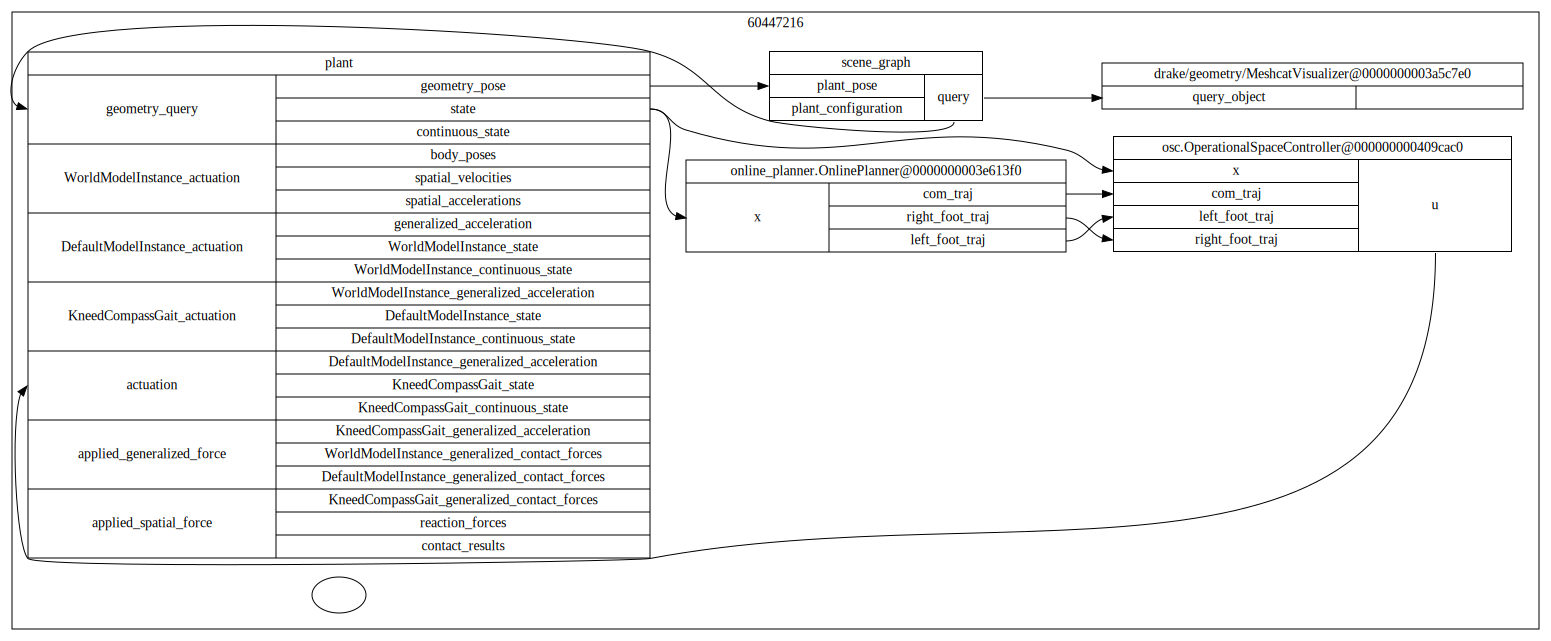

RuntimeError: MultibodyPlant's discrete update solver failed to converge at simulation time = 0.193 with discrete update period = 0.0005. This usually means that the plant's discrete update period is too large to resolve the system's dynamics for the given simulation conditions. This is often the case during abrupt collisions or during complex and fast changing contact configurations. Another common cause is the use of high gains in the simulation of closed loop systems. These might cause numerical instabilities given our discrete solver uses an explicit treatment of actuation inputs. Possible solutions include:
  1. reduce the discrete update period set at construction,
  2. decrease the high gains in your controller whenever possible,
  3. switch to a continuous model (discrete update period is zero),
     though this might affect the simulation run time.

In [10]:
import pydot
import numpy as np
from IPython.display import SVG, display

from pydrake.all import (
    # ConnectMeshcatVisualizer,
    JointIndex,
    Simulator,
    DiagramBuilder,
    AddMultibodyPlantSceneGraph,
    Parser,
    RigidTransform,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    ConstantVectorSource,
    ConstantValueSource,
    PiecewisePolynomial,
    AbstractValue,
    HalfSpace,
    CoulombFriction,
    StartMeshcat,
)

from osc_gains import OscGains


import importlib

import osc
importlib.reload(osc)
from osc import OperationalSpaceController

import online_planner
importlib.reload(online_planner)
from online_planner import OnlinePlanner

import offline_planner
importlib.reload(offline_planner)
from offline_planner import OfflinePlanner
from finite_state_machine import FiniteStateMachine


import point_tracking_objective
importlib.reload(point_tracking_objective)

import operational_space_tracking_objective
importlib.reload(operational_space_tracking_objective)

import center_of_mass_position_tracking_objective
importlib.reload(center_of_mass_position_tracking_objective)

# # Start meshcat simulation software
# meshcat = StartMeshcat()

# Create block diagram of system
builder = DiagramBuilder()
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, 0.0005)
X_WG = HalfSpace.MakePose(
np.array([0, 0, 1]),
np.zeros(3),
)
plant.RegisterCollisionGeometry(
plant.world_body(), X_WG, HalfSpace(), "collision", CoulombFriction(1.0, 1.0)
)
parser = Parser(plant)
parser.AddModelFromFile("3d_biped.urdf")
plant.Finalize()
num_positions = plant.num_positions()
num_joints = plant.num_joints()

print("floating base:")
for j in plant.GetFloatingBaseBodies():
    body = plant.get_body(j)
    start = body.floating_positions_start()
    print(body.name())

print("joints:")
# Print names of each joint
for i in range(num_joints):
    index = JointIndex(i)
    j = plant.get_joint(index)
    print(j.name())

# Print number of positions
print(f"number of positions: {num_positions}")
print(f"number of joints: {num_joints}")

# Get OSC gains
Kp = np.diag([100, 0, 100])
Kd = np.diag([10, 0, 10])
W = np.diag([1, 0, 1])

Wcom = np.eye(3)

gains = OscGains(
Kp,
Kd,
Wcom,
Kp,
Kd,
W,
Kp,
Kd,
W,
)

# Setup offline trajectory optimization
offline_planner = OfflinePlanner()

t_begin_motion = 0.3 # robot starts moving after 0.3 seconds
t_takeoff = 0.3 # takeoff within 0.3 seconds
distance = np.array([1.0, 0])
(
com_mode_0_traj,
com_mode_1_traj,
com_mode_2_traj,
lf_mode_0_traj,
lf_mode_1_traj,
lf_mode_2_traj,
rf_mode_0_traj,
rf_mode_1_traj,
rf_mode_2_traj,
) = offline_planner.find_trajectories(offline_planner.aslip.x_0 * 2, t_begin_motion+t_takeoff, distance)

fsm = FiniteStateMachine()

planner = builder.AddSystem(
OnlinePlanner(com_mode_0_traj, com_mode_1_traj, com_mode_2_traj, lf_mode_0_traj,lf_mode_1_traj,lf_mode_2_traj,rf_mode_0_traj,rf_mode_1_traj,rf_mode_2_traj, fsm)
)

# Wire plant to planner
builder.Connect(plant.get_state_output_port(), planner.get_state_input_port())

# Wire OSC to plant
osc = builder.AddSystem(OperationalSpaceController(gains, fsm))
builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# Wire OSC inputs
builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())

builder.Connect(
planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
)
builder.Connect(
planner.get_left_foot_traj_output_port(), osc.get_traj_input_port("left_foot_traj")
)
builder.Connect(
planner.get_right_foot_traj_output_port(), osc.get_traj_input_port("right_foot_traj")
)

# TODO: Adjust target wlaking speed here
# walking_speed = 0.5  # walking speed in m/s

# osc = builder.AddSystem(OperationalSpaceController(gains))
# planner = builder.AddSystem(footstep_planner.LipTrajPlanner())
# speed_src = builder.AddSystem(ConstantVectorSource(np.array([walking_speed])))
# base_traj_src = builder.AddSystem(
#     ConstantValueSource(
#         AbstractValue.Make(
#             PiecewisePolynomial(
#                 np.zeros(
#                     1,
#                 )
#             )
#         )
#     )
# )

# Wire planner inputs
# builder.Connect(plant.get_state_output_port(), planner.get_state_input_port())
# builder.Connect(speed_src.get_output_port(), planner.get_walking_speed_input_port())

# Wire OSC inputs
# builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())
# builder.Connect(
#     planner.get_swing_foot_traj_output_port(),
#     osc.get_traj_input_port("swing_foot_traj"),
# )
# builder.Connect(
#     planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
# )
# builder.Connect(
#     base_traj_src.get_output_port(), osc.get_traj_input_port("base_joint_traj")
# )

# Add the visualizer
vis_params = MeshcatVisualizerParams(publish_period=0.01)
MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat, params=vis_params)

# Wire OSC to plant
# builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# simulate
diagram = builder.Build()
display(
SVG(
    pydot.graph_from_dot_data(diagram.GetGraphvizString(max_depth=2))[
        0
    ].create_svg()
)
)

sim_time = 10.0
simulator = Simulator(diagram)
simulator.Initialize()
simulator.set_target_realtime_rate(1)

plant_context = diagram.GetMutableSubsystemContext(
plant, simulator.get_mutable_context()
)
# print(plant_context)
q = np.zeros((num_positions,))

# quaternion
q[0] = 1
q[1] = 0
q[2] = 0
q[3] = 0

# x, y, z
q[4] = 0
q[5] = 0
q[6] = 1.15

q[8] = 0.2
q[12] = -0.2

q[10] = 0  # left knee
q[14] = 0  # right knee

plant.SetPositions(plant_context, q)

import time

time.sleep(10)

simulator.AdvanceTo(sim_time)

# Set the robot state
# plant_context = diagram.GetMutableSubsystemContext(
#     plant, simulator.get_mutable_context())
# q = np.zeros((plant.num_positions(),))
# q[1] = 0.8
# theta = -np.arccos(q[1])
# q[3] = theta
# q[4] = -2 * theta
# q[5] = theta
# q[6] = -2 * theta
# plant.SetPositionsplant_context, q)

# Simulate the robot
# simulator.AdvanceTo(sim_time)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d30b34-d2b0-45d2-80c6-e254c58714f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>